In [1]:
import numpy as  np
import pandas as pd
import matplotlib
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
#reading Dataset
sales= pd.read_csv(r"C:\Users\user\Downloads\joined_prdct_sales.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sales
sales.drop(['TotalPrice','ModifyDate','SalesDate','TransactionNumber'],axis=1,inplace=True)

In [4]:
#Sanity Check
sales.head()
sales.shape

(6758125, 13)

In [5]:
sales.describe()

,ProductID,CategoryID,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount
count,6.758125e+06,6.758125e+06,2.661575e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,1.351194e+06
mean,2.265474e+02,5.864278e+00,6.610745e+01,3.379063e+06,1.199972e+01,4.939567e+04,1.300401e+01,1.498871e-01
std,1.304744e+02,3.267920e+00,3.490174e+01,1.950903e+06,6.632689e+00,2.850504e+04,7.209701e+00,4.999989e-02
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-01
25%,1.140000e+02,3.000000e+00,3.300000e+01,1.689532e+06,6.000000e+00,2.470700e+04,7.000000e+00,1.000000e-01
50%,2.270000e+02,6.000000e+00,7.200000e+01,3.379063e+06,1.200000e+01,4.941400e+04,1.300000e+01,1.000000e-01
75%,3.400000e+02,9.000000e+00,9.500000e+01,5.068594e+06,1.800000e+01,7.407500e+04,1.900000e+01,2.000000e-01
max,4.520000e+02,1.100000e+01,1.200000e+02,6.758125e+06,2.300000e+01,9.875900e+04,2.500000e+01,2.000000e-01


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 13 columns):
ProductID        int64
ProductName      object
Price            object
CategoryID       int64
Class            object
Resistant        object
IsAllergic       object
VitalityDays     float64
SalesID          int64
SalesPersonID    int64
CustomerID       int64
Quantity         int64
Discount         float64
dtypes: float64(2), int64(6), object(5)
memory usage: 670.3+ MB


In [7]:
#count the missing Values
sales.isnull().values.sum()

13542590

In [8]:
#Calculate the percentage of Missing Values
sales.isnull().sum()*100/sales.shape[0]

ProductID         0.000000
ProductName       0.000000
Price             0.000000
CategoryID        0.000000
Class             0.000000
Resistant        30.983890
IsAllergic       28.782821
VitalityDays     60.616665
SalesID           0.000000
SalesPersonID     0.000000
CustomerID        0.000000
Quantity          0.000000
Discount         80.006378
dtype: float64

In [9]:
#dropping the na cells
sales_clean = sales.dropna()

In [10]:
#Sanity check
sales_clean.shape
sales_clean.isnull().sum()

ProductID        0
ProductName      0
Price            0
CategoryID       0
Class            0
Resistant        0
IsAllergic       0
VitalityDays     0
SalesID          0
SalesPersonID    0
CustomerID       0
Quantity         0
Discount         0
dtype: int64

In [11]:
sales_clean["ProductName"] = sales_clean["ProductName"].astype('category')
sales_clean.dtypes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ProductID           int64
ProductName      category
Price              object
CategoryID          int64
Class              object
Resistant          object
IsAllergic         object
VitalityDays      float64
SalesID             int64
SalesPersonID       int64
CustomerID          int64
Quantity            int64
Discount          float64
dtype: object

In [12]:
sales_clean.head(15)

,ProductID,ProductName,Price,CategoryID,Class,Resistant,IsAllergic,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount
29576,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,888,8,78056,20,0.1
29580,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,1674,11,28156,8,0.1
29596,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,8072,2,43444,11,0.1
29597,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,8114,8,57986,15,0.2
29603,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,12987,7,36591,10,0.1
29605,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,13332,4,67525,18,0.1
29610,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,15217,3,85564,22,0.2
29614,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,16235,7,76673,20,0.2
29615,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,16569,12,50200,13,0.2
29626,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,22531,7,55397,15,0.1


In [13]:
#converting ProductName variable into numerical datatype as the algorithm cannot perform analysis on object/string datatype
sales_clean["ProductName_labled"] = sales_clean["ProductName"].cat.codes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
sales_clean

,ProductID,ProductName,Price,CategoryID,Class,Resistant,IsAllergic,VitalityDays,SalesID,SalesPersonID,CustomerID,Quantity,Discount,ProductName_labled
29576,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,888,8,78056,20,0.1,44
29580,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,1674,11,28156,8,0.1,44
29596,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,8072,2,43444,11,0.1,44
29597,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,8114,8,57986,15,0.2,44
29603,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,12987,7,36591,10,0.1,44
29605,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,13332,4,67525,18,0.1,44
29610,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,15217,3,85564,22,0.2,44
29614,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,16235,7,76673,20,0.2,44
29615,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,16569,12,50200,13,0.2,44
29626,3,Onions - Cippolini,"9,1379",9,Medium,Weak,False,111.0,22531,7,55397,15,0.1,44


In [15]:
sales_clean["Class"] = sales_clean["Class"].astype('category')
sales_clean.dtypes
sales_clean["Class_labled"] = sales_clean["Class"].cat.codes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
sales_clean.dtypes

ProductID                int64
ProductName           category
Price                   object
CategoryID               int64
Class                 category
Resistant               object
IsAllergic              object
VitalityDays           float64
SalesID                  int64
SalesPersonID            int64
CustomerID               int64
Quantity                 int64
Discount               float64
ProductName_labled        int8
Class_labled              int8
dtype: object

In [17]:
sales_clean.drop(['ProductName','Price','Resistant','Class','Resistant','IsAllergic','VitalityDays','SalesID','SalesPersonID','Quantity','Discount'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
sales_clean.drop('CustomerID',axis=1,inplace=True)
sales_clean.dtypes

ProductID             int64
CategoryID            int64
ProductName_labled     int8
Class_labled           int8
dtype: object

In [19]:
X = sales_clean.drop('CategoryID',axis=1)  
y = sales_clean['CategoryID']

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [21]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train.values, y_train.values)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = svclassifier.predict(X_test)

In [23]:
#Checking with confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[ 6205     0     0     0     0     0     0     0     0     0     0]
 [    0  5272     0     0     0     0     0     0     0     0     0]
 [    0     0  9762     0     0     0     0     0     0     0     0]
 [    0     0     0  3630     0     0     0     0     0     0     0]
 [    0     0     0     0  3505     0     0     0     0     0     0]
 [    0     0     0     0     0  7199     0     0     0     0     0]
 [    0     0     0     0     0     0  4560     0     0     0     0]
 [    0     0     0     0     0     0     0  8127     0     0     0]
 [    0     0     0     0     0     0     0     0  9845     0     0]
 [    0     0     0     0     0     0     0     0     0  7904     0]
 [    0     0     0     0     0     0     0     0     0     0 11852]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6205
           2       1.00      1.00      1.00      5272
           3       1.00      1.00      1.00      9762
           4       1.00

In [24]:
#IMporting  crossvalidation libraires 
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:

# function for calculating accuracy & confusion matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [26]:
print_score(svclassifier, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     14659
           2       1.00      1.00      1.00     12703
           3       1.00      1.00      1.00     22957
           4       1.00      1.00      1.00      8275
           5       1.00      1.00      1.00      8224
           6       1.00      1.00      1.00     16583
           7       1.00      1.00      1.00     10566
           8       1.00      1.00      1.00     18756
           9       1.00      1.00      1.00     22804
          10       1.00      1.00      1.00     18889
          11       1.00      1.00      1.00     27259

   micro avg       1.00      1.00      1.00    181675
   macro avg       1.00      1.00      1.00    181675
weighted avg       1.00      1.00      1.00    181675


Confusion Matrix: 
 [[14659     0     0     0     0     0     0     0     0     0     0]
 [    0 12703     0     0     0  

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5, 1.0, 'SVM Decision Region Boundary')

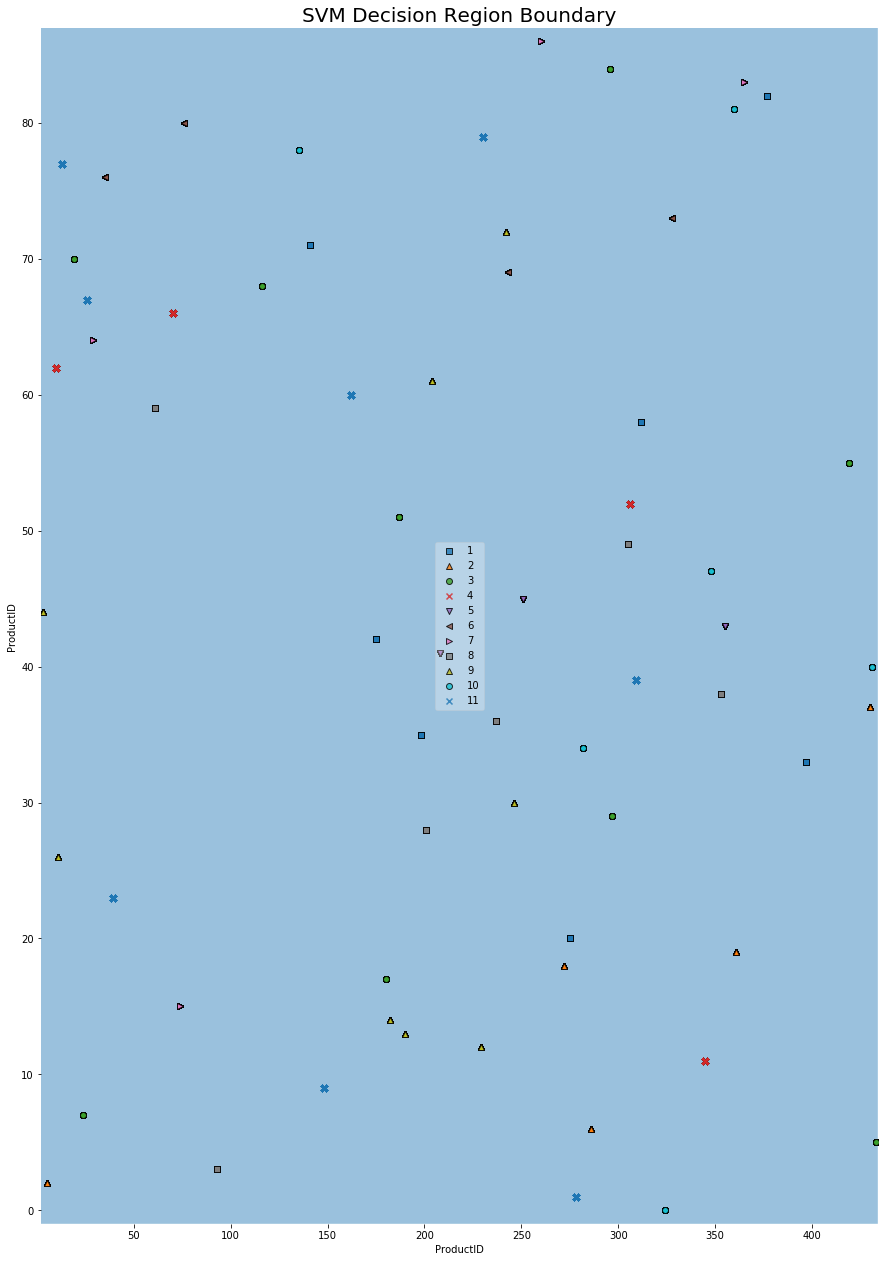

In [48]:
# Plot Decision Region using mlxtend's awesome plotting function
value=10
width=8
array_2 = np.array(y_train)
array_1 = np.array(X_train)
plot_decision_regions(X=array_1, 
                      y=array_2,
                      clf=svclassifier, 
                      legend=10,
                      filler_feature_values={2: value},
                          filler_feature_ranges={2: width})
#%pylab inline
pylab.rcParams['figure.figsize'] = (15,22)
# Update plot object with X/Y axis labels and Figure Title

plt.xlabel(X_train.columns[0], size=10)
plt.ylabel(X_train.columns[0], size=10)
plt.title('SVM Decision Region Boundary', size=20)
